## CPSC 340 Lecture 16 accompanying demo

Robust linear regression with gradient descent

In [2]:
import numpy as np
import sklearn
import sklearn.linear_model
import matplotlib.pyplot as plt
%matplotlib inline

Here we generate some random data in 1 dimension and fit a linear model.

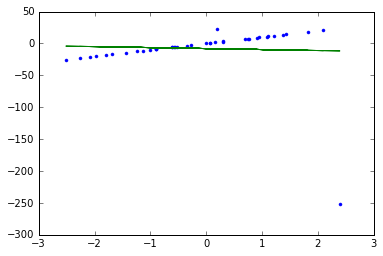

w = -1.535860
b = -7.968192


In [10]:
# generate random data
x = np.random.randn(40)
y = 10*x
# add random outliers
Noutliers = 3
y[:Noutliers] = -100*(x[:Noutliers]+np.random.randn(Noutliers))

# plot the points
plt.plot(x,y,'.')

X = x[:,None] # reshape for sklearn

# fit a linear regression model
lr = sklearn.linear_model.LinearRegression()
lr.fit(X,y)
plt.plot(x, lr.predict(X))

plt.show()


print("w = %f" % lr.coef_)
print("b = %f" % lr.intercept_)

The model is pretty disappointing. We try the L1 loss.

For linear regression in one dimension our L1 objective becomes

$$\mathcal{L}(w,b)=\displaystyle \sum_{n=1}^N\left|y_n-  (w x_n +b)\right| $$

The gradient is

$$\frac{\partial \mathcal{L}}{\partial w} = \sum_{n=1}^N - x_n \textrm{sign}\left(y_n-  (w x_n +b)\right)$$ 

$$\frac{\partial \mathcal{L}}{\partial b} = \sum_{n=1}^N - \textrm{sign}\left(y_n-  (w x_n +b)\right)$$ 

(In this humble demo we aren't properly dealing with the undefined derivative at the discontinuity... we just naively ignore it.)

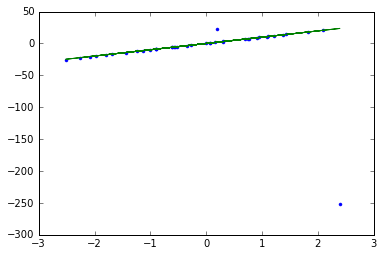

w = 9.848150
b = 0.020000


In [11]:
w = 0
b = 0
alpha = 0.01

Nsteps = 1000
f = lambda x,w,b: w*x+b

for t in range(Nsteps):
    dLdw = -np.sum(x*np.sign(y-f(x,w,b)))
    dLdb = -np.sum(np.sign(y-f(x,w,b)))
    w -= alpha*dLdw
    b -= alpha*dLdb
    
plt.figure()
plt.plot(x,y,'.')
plt.plot(x,w*x+b)
plt.show()

print("w = %f" % w)
print("b = %f" % b)


Looks good... high five!